**Brian Blaylock**  
*December 17, 2020*

# 🚢 Winds in Chesapeake Bay -- August 2017

In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

from synoptic.services import stations_nearesttime, stations_timeseries, networks
from synoptic.plots import map_metadata, plot_timeseries_wind

# Use map-making feature from HRRR-B module
from hrrrb.plots import common_features, pc
from BB_maps.extent import adjust_extent

/p/home/blaylock/.BB_credentials.cfg


I already determined what stations are available and what I want to look at.

In [2]:
b = stations_timeseries(start=datetime(2017, 8, 1), end=datetime(2017, 8, 24),
                        vars='wind_speed,wind_direction,wind_gust',
                        stid='YKRV2, 44072, WDSV2, CBBV2',
                        qc_checks='all')


 🚚💨 Speedy Delivery from Synoptic API [timeseries]: https://api.synopticdata.com/v2/stations/timeseries?start=201708010000&end=201708240000&vars=wind_speed,wind_direction,wind_gust&stid=YKRV2,+44072,+WDSV2,+CBBV2&qc_checks=all&token=2562b729557f45f5958516081f06c9eb

Returned [4] stations. ['YKRV2', 'WDSV2', 'CBBV2', '44072']


---
Also get DataFrame of Networks so I can match the Network numbers with the names when I plot the timeseries.

In [3]:
net = networks()


 🚚💨 Speedy Delivery from Synoptic API [networks]: https://api.synopticdata.com/v2/networks?token=2562b729557f45f5958516081f06c9eb



# Create a Map object
Uses my special `common_features` function to create the cartopy map and add features

(-76.46528199999999,
 -75.98134800000003,
 36.831520000000005,
 37.385149999999996)

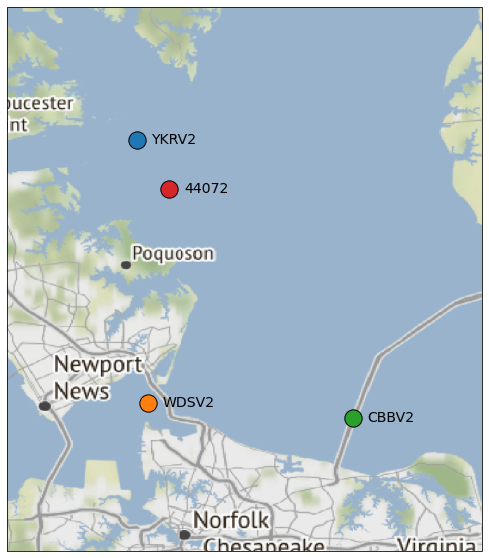

In [4]:
plt.figure(figsize=[10,10])

ax = common_features('10m', STAMEN=True, COASTLINES=False,
                     STAMEN_kwargs=dict(zoom=10, style='terrain'))

for i in b:
    ax.scatter(i.attrs['longitude'], i.attrs['latitude'],
               edgecolor='k', s=300)
    ax.text(i.attrs['longitude']+.015, i.attrs['latitude'], i.attrs['STID'],
            va='center', ha='left', fontsize=14)
    
adjust_extent(fraction=.5)

# Create Timeseries Plots of Wind for those 4 sites

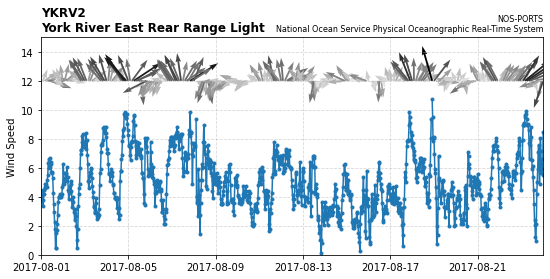

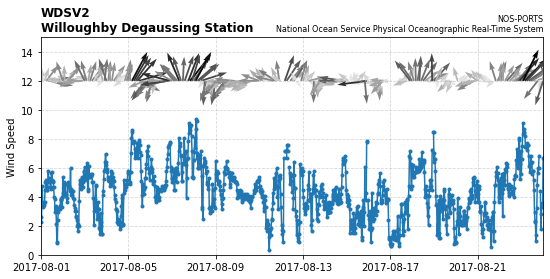

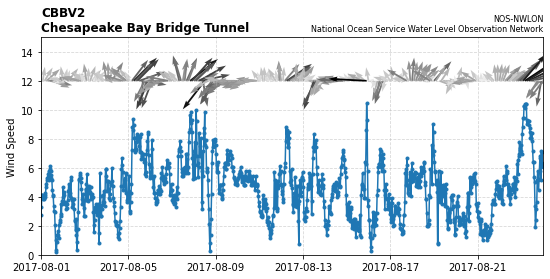

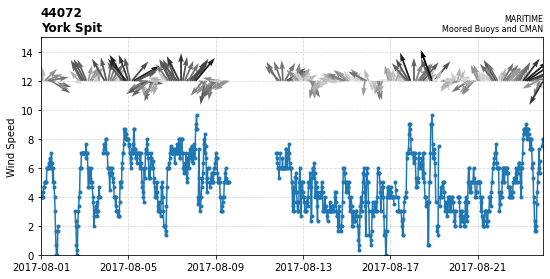

In [5]:
for n, i in enumerate(b):
    plt.figure(n, figsize=[9,4])
    
    # Apply Quality Control Checks
    qc = np.array([x is None for x in i.attrs['QC']['wind_speed_set_1']])
    i = i.loc[qc]
    
    j = i.resample('30min').mean()
    plt.plot(j.index, j.wind_speed, label=i.attrs['STID'], marker='.')
    plt.title(f"{i.attrs['STID']}\n{i.attrs['NAME']}", loc='left', fontweight='bold')
    plt.title(f"{net.loc[i.attrs['MNET_ID']].SHORTNAME}\n{net.loc[i.attrs['MNET_ID']].LONGNAME}",
              loc='right', fontsize=8)
    plt.ylim(0,15)
    plt.ylabel('Wind Speed')
    thin=4
    plt.quiver(j.index[::thin], np.ones(len(j.index))[::thin]*12,
               j.wind_u[::thin], j.wind_v[::thin],
               j.wind_speed[::thin], cmap='Greys')
    plt.xlim(j.index[0], j.index[-1])

In [6]:
# Look at the QC summary
b[0].attrs['QC_SUMMARY']

{'QC_SHORTNAMES': {'18': 'ma_stat_cons_check', '16': 'ma_temp_cons_check'},
 'QC_CHECKS_APPLIED': ['all'],
 'PERCENT_OF_TOTAL_OBSERVATIONS_FLAGGED': 1.37,
 'QC_SOURCENAMES': {'18': 'MADIS', '16': 'MADIS'},
 'TOTAL_OBSERVATIONS_FLAGGED': 761.0,
 'QC_NAMES': {'18': 'MADIS Spatial Consistency Check',
  '16': 'MADIS Temporal Consistency Check'}}